In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
productivity = '~/uniwork/ads/ADS-European-Productivity/Datasets/cleaned_Productivity.csv'
prod_df = pd.read_csv(productivity)

In [3]:
#the full dataset doesn't load cause it's too big so this is just general government expenditure as percentage og gdp
gov_exp = '~/uniwork/ads/ADS-European-Productivity/Datasets/gov_exp.csv'
exp_df = pd.read_csv(gov_exp)

In [4]:
exp_df

DATAFLOW        LAST UPDATE freq    unit sector cofog99  \
0      ESTAT:GOV_10A_EXP(1.0)  22/02/23 11:00:00    A  PC_GDP    S13    GF01   
1      ESTAT:GOV_10A_EXP(1.0)  22/02/23 11:00:00    A  PC_GDP    S13    GF01   
2      ESTAT:GOV_10A_EXP(1.0)  22/02/23 11:00:00    A  PC_GDP    S13    GF01   
3      ESTAT:GOV_10A_EXP(1.0)  22/02/23 11:00:00    A  PC_GDP    S13    GF01   
4      ESTAT:GOV_10A_EXP(1.0)  22/02/23 11:00:00    A  PC_GDP    S13    GF01   
...                       ...                ...  ...     ...    ...     ...   
40795  ESTAT:GOV_10A_EXP(1.0)  22/02/23 11:00:00    A  PC_GDP    S13   TOTAL   
40796  ESTAT:GOV_10A_EXP(1.0)  22/02/23 11:00:00    A  PC_GDP    S13   TOTAL   
40797  ESTAT:GOV_10A_EXP(1.0)  22/02/23 11:00:00    A  PC_GDP    S13   TOTAL   
40798  ESTAT:GOV_10A_EXP(1.0)  22/02/23 11:00:00    A  PC_GDP    S13   TOTAL   
40799  ESTAT:GOV_10A_EXP(1.0)  22/02/23 11:00:00    A  PC_GDP    S13   TOTAL   

      na_item geo  TIME_PERIOD  OBS_VALUE OBS_FLAG  
0          TE  AT         2005        7.8      NaN  
1          TE  AT         2006        7.7      NaN  
2          TE  AT         2007        7.6      NaN  
3          TE  AT         2008        7.2      NaN  
4          TE  AT         2009        7.8      NaN  
...       ...  ..          ...        ...      ...  
40795      TE  SK         2017       39.5      NaN  
40796      TE  SK         2018       39.7      NaN  
40797      TE  SK         2019       40.5      NaN  
40798      TE  SK         2020       44.8      NaN  
40799      TE  SK         2021       46.3      NaN  

[40800 rows x 11 columns]

In [5]:
exp_df.drop('OBS_FLAG', axis = 1, inplace = True)

In [6]:
set(exp_df['sector'])

{'S13'}

In [20]:

sectors = set(exp_df['cofog99'])
countries = set(exp_df['geo'])

In [12]:
#make a dictionary to map the names of the things measured to what they actually represent


In [8]:
set(exp_df['na_item'])

{'TE'}

In [9]:
set(exp_df['DATAFLOW'])

{'ESTAT:GOV_10A_EXP(1.0)'}

In [13]:
exp_df.drop('DATAFLOW', axis = 1, inplace = True)
exp_df.drop('LAST UPDATE', axis = 1, inplace = True)
exp_df.drop('unit', axis = 1, inplace = True)
exp_df.drop('sector', axis = 1, inplace = True)

In [17]:
exp_df.drop('freq', axis = 1, inplace = True)
exp_df.drop('na_item', axis = 1, inplace = True)
exp_df.head()

cofog99 geo  TIME_PERIOD  OBS_VALUE
0    GF01  AT         2005        7.8
1    GF01  AT         2006        7.7
2    GF01  AT         2007        7.6
3    GF01  AT         2008        7.2
4    GF01  AT         2009        7.8

In [18]:
exp_df

cofog99 geo  TIME_PERIOD  OBS_VALUE
0        GF01  AT         2005        7.8
1        GF01  AT         2006        7.7
2        GF01  AT         2007        7.6
3        GF01  AT         2008        7.2
4        GF01  AT         2009        7.8
...       ...  ..          ...        ...
40795   TOTAL  SK         2017       39.5
40796   TOTAL  SK         2018       39.7
40797   TOTAL  SK         2019       40.5
40798   TOTAL  SK         2020       44.8
40799   TOTAL  SK         2021       46.3

[40800 rows x 4 columns]

In [35]:
exp_df = exp_df[exp_df['cofog99'] != 'TOTAL']


In [36]:
import matplotlib.pyplot as plt
from matplotlib.colors import hsv_to_rgb

hue_values = np.linspace(0, 1, 80)

# Convert the hue values to RGB colors using the hsv_to_rgb function
colors_array = hsv_to_rgb(np.column_stack([hue_values, np.ones_like(hue_values), np.ones_like(hue_values)]))




LU


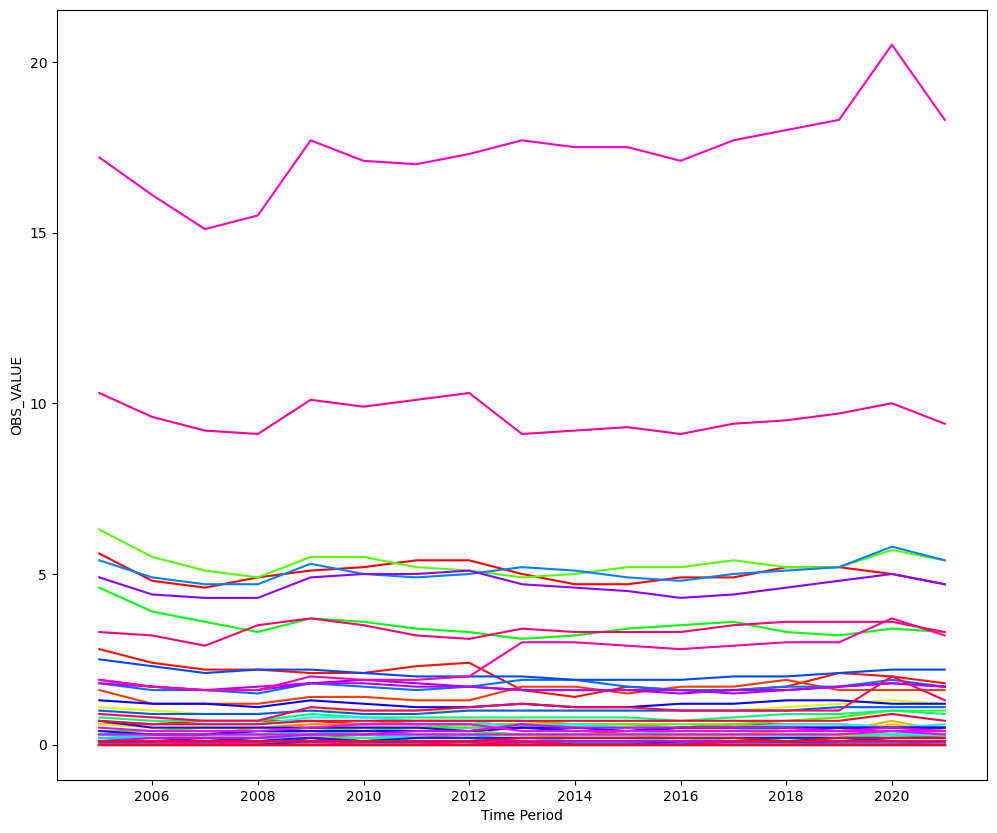

HU


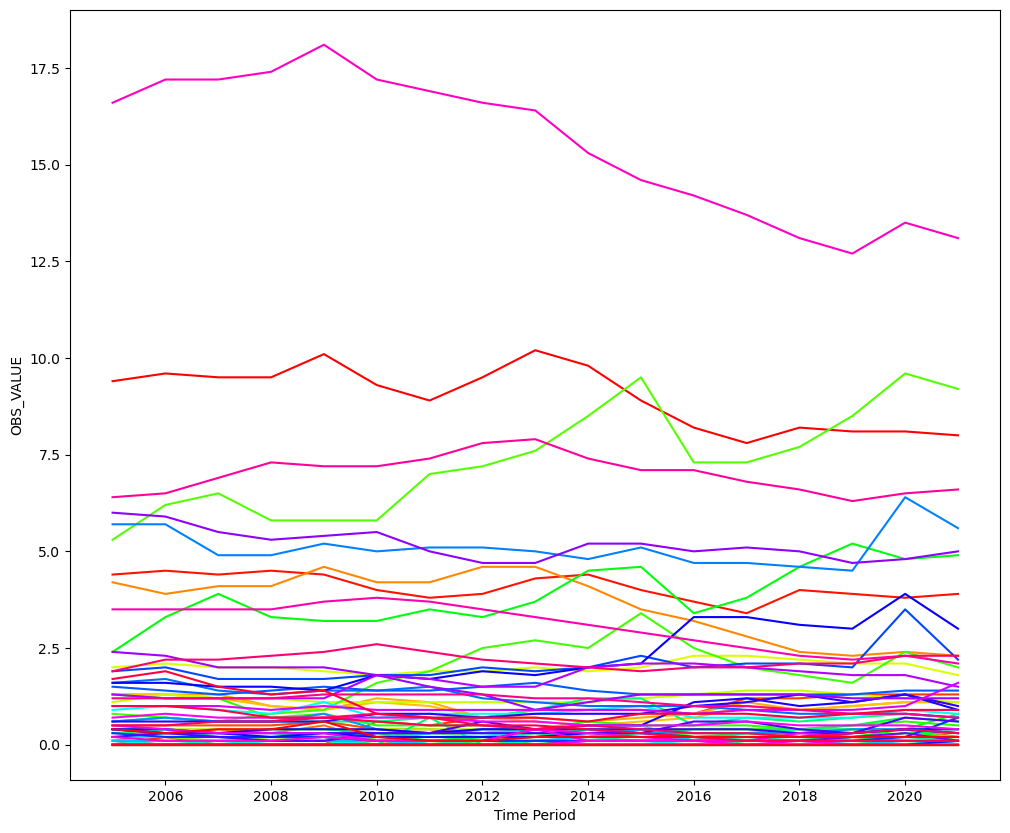

HR


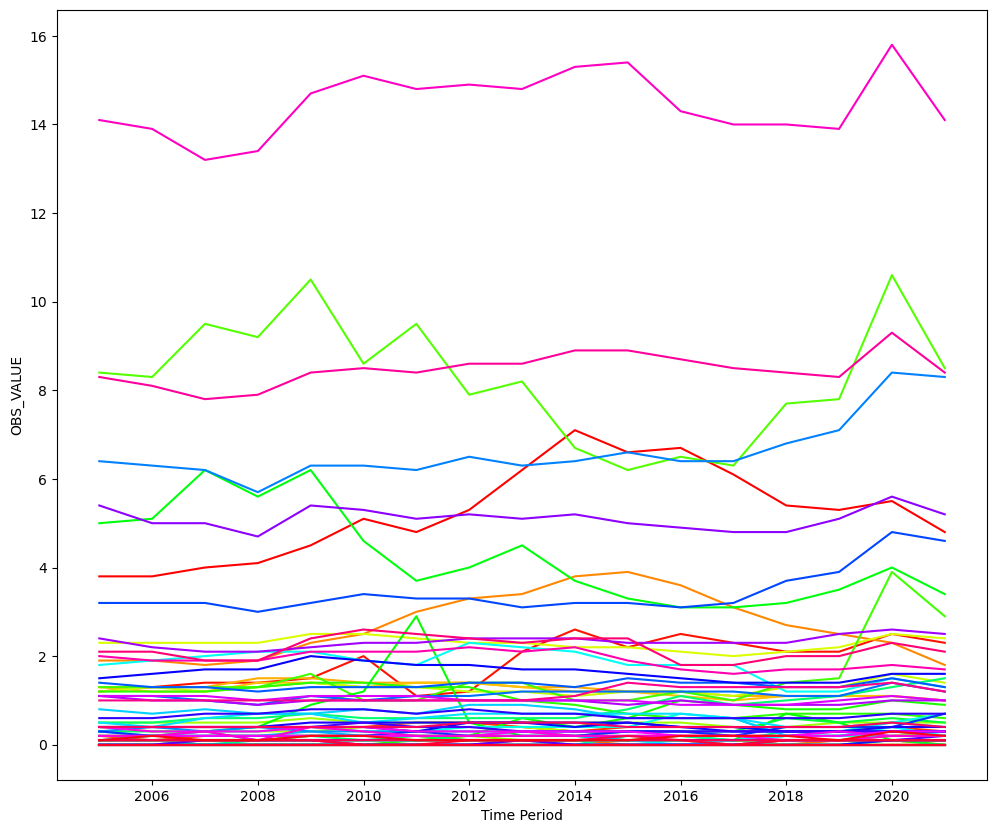

LT


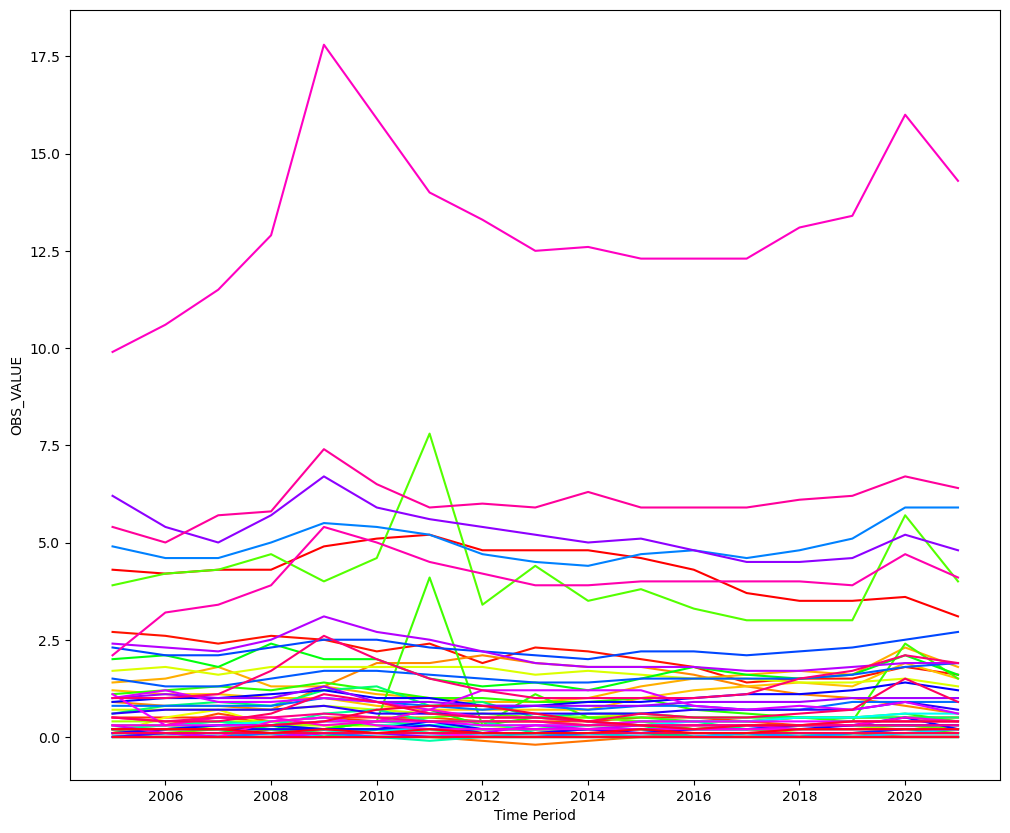

PL


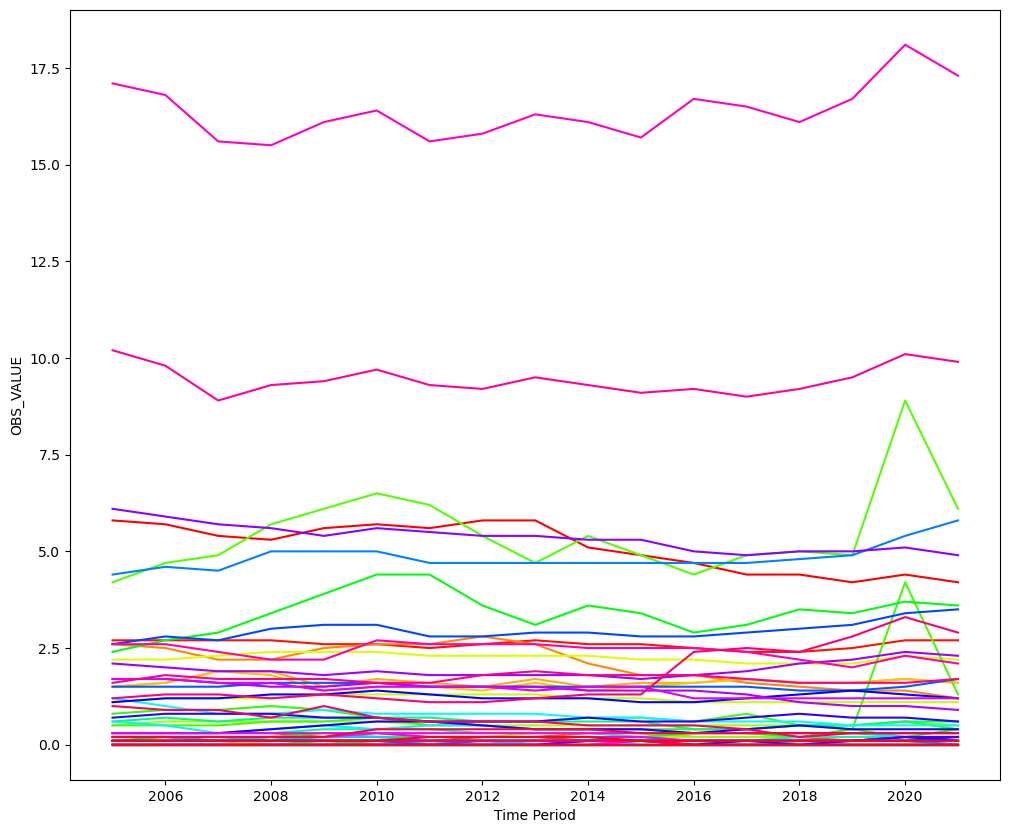

SK


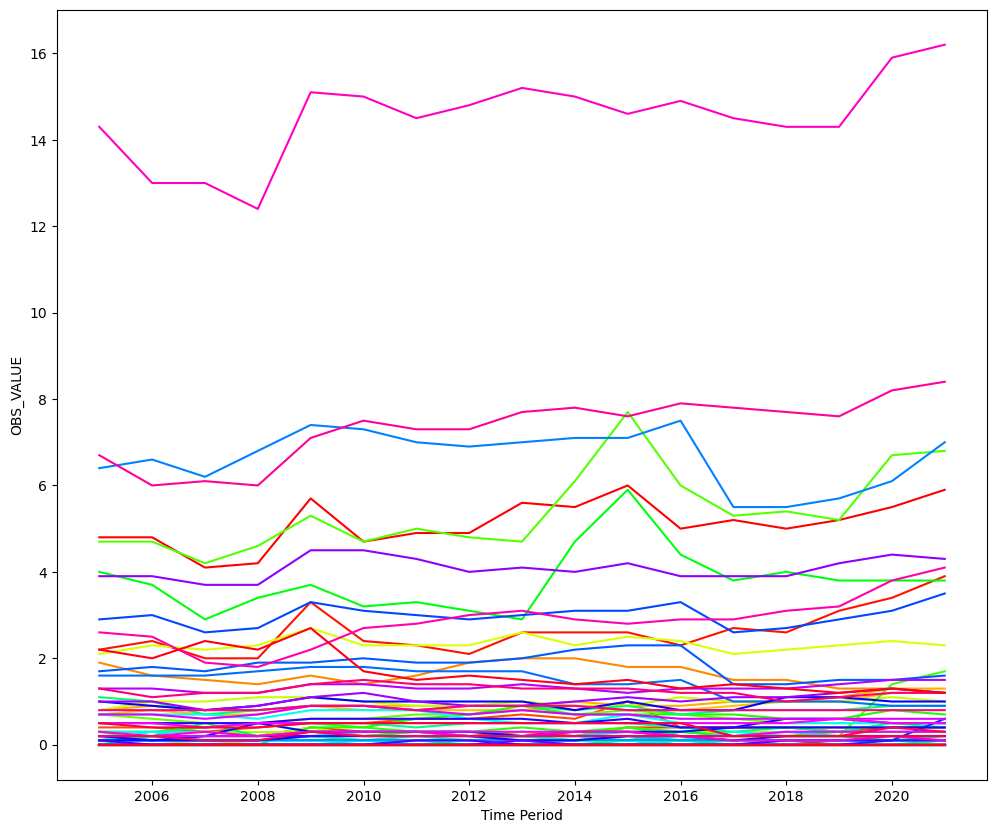

FI


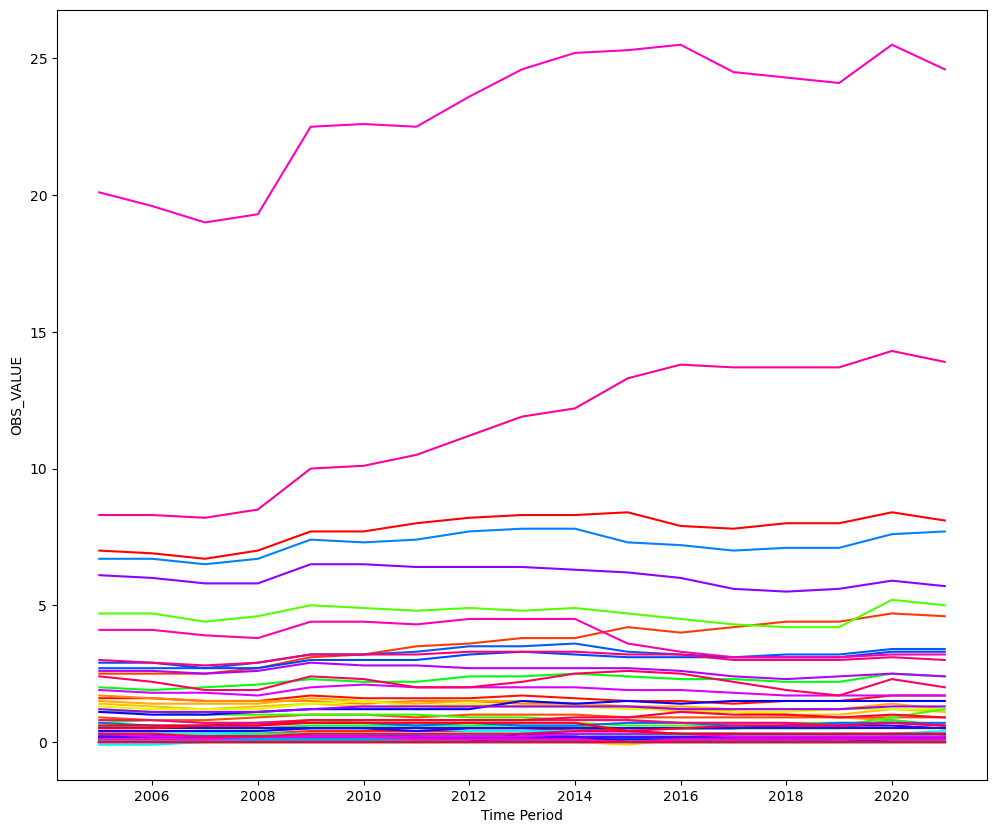

MT


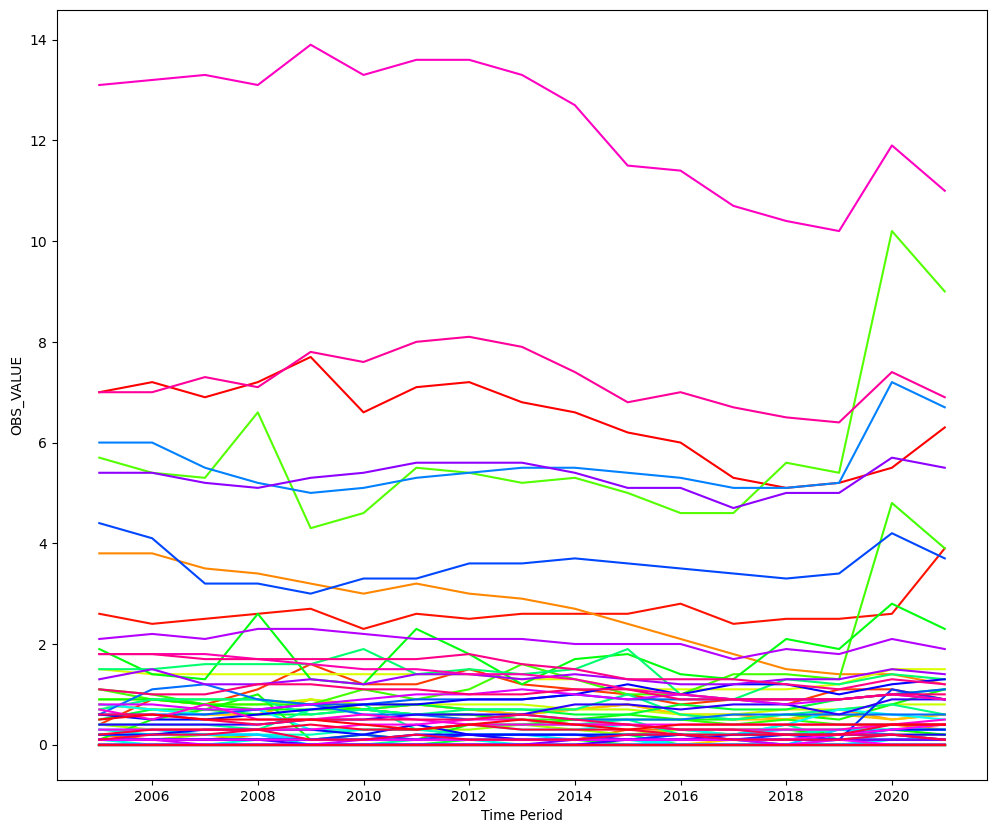

IS


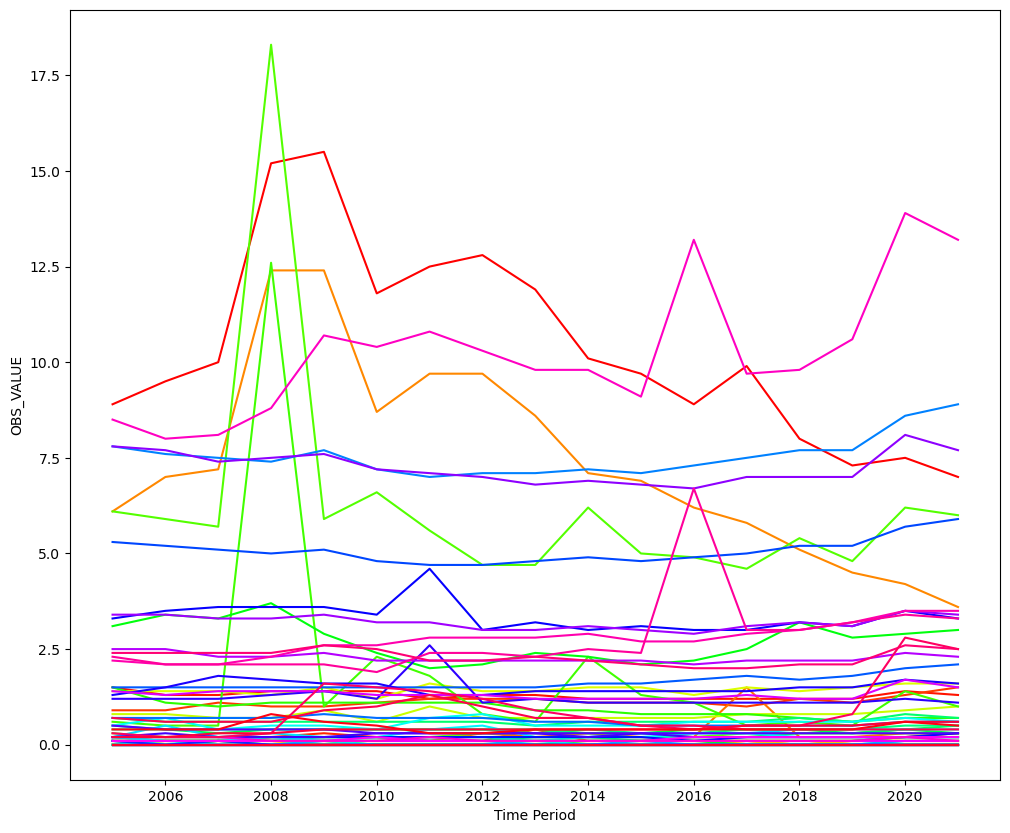

DE


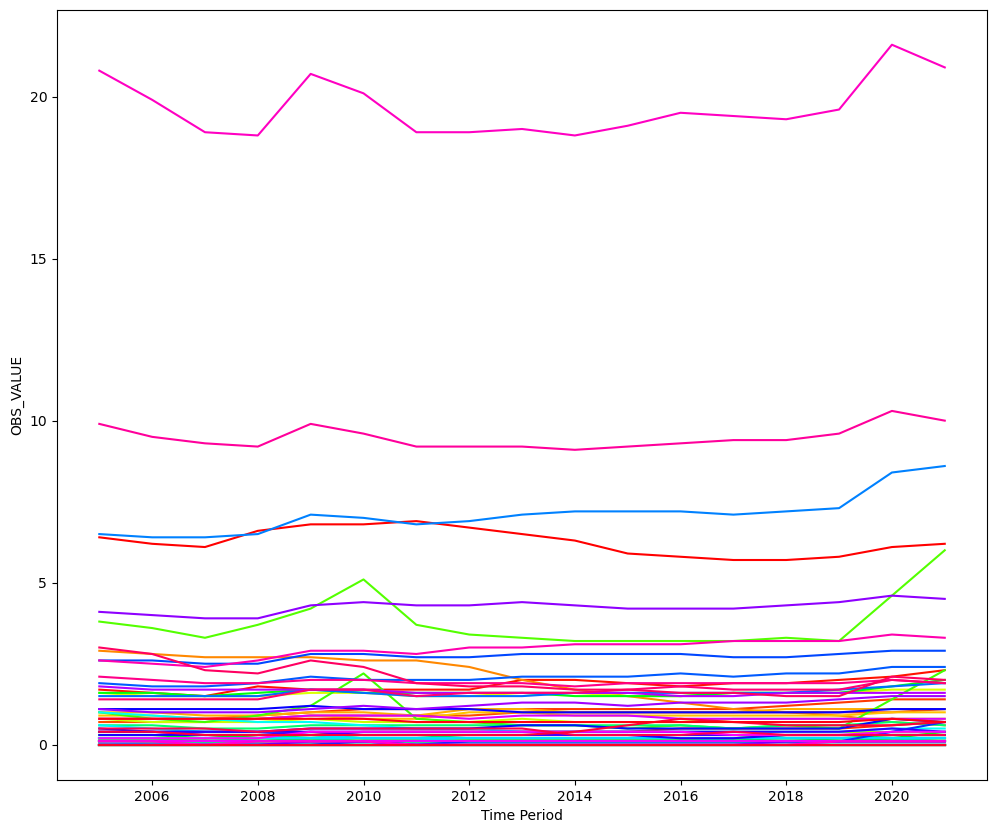

EL


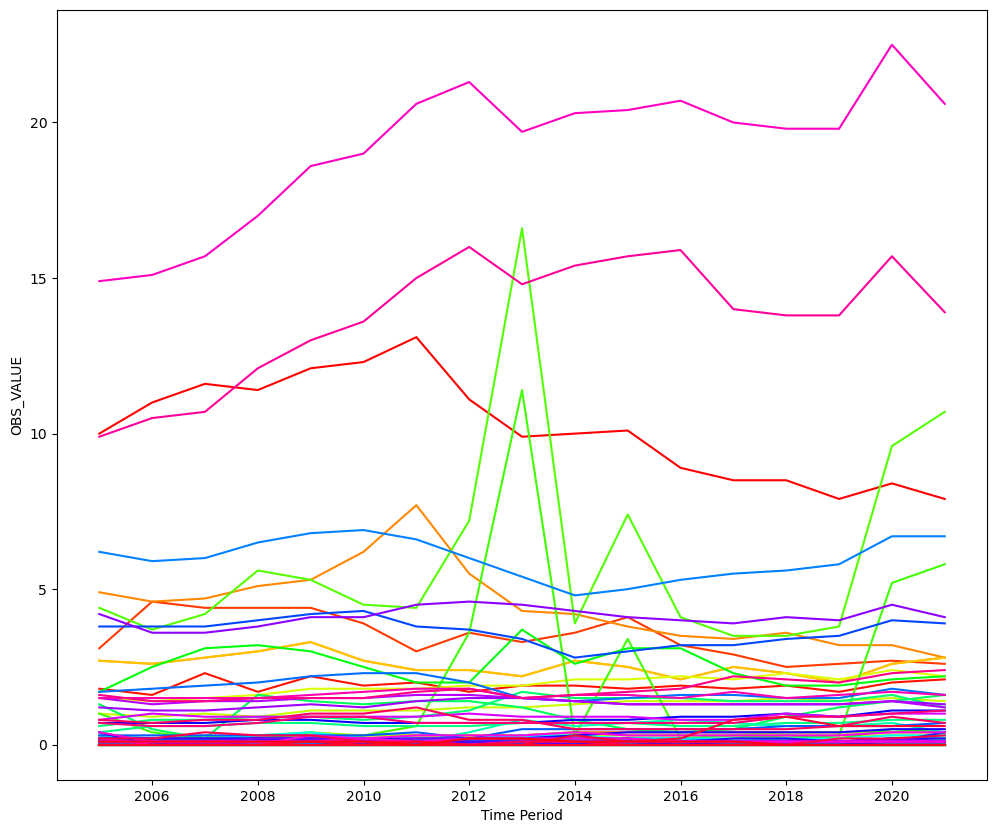

NO


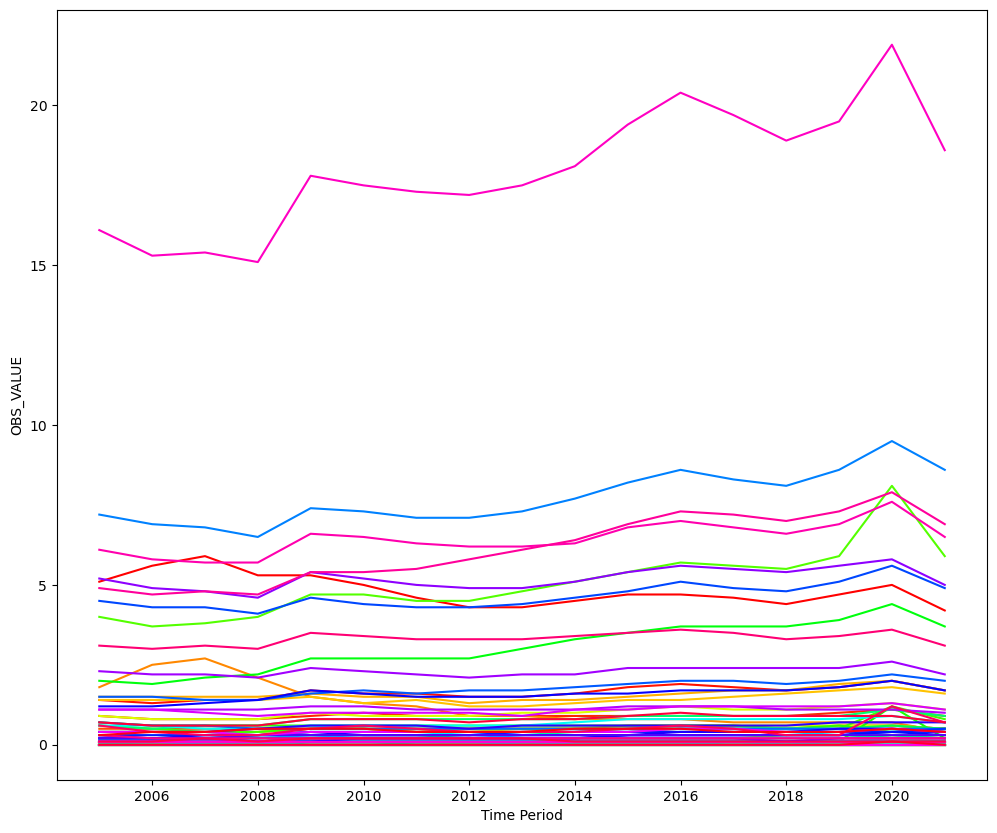

PT


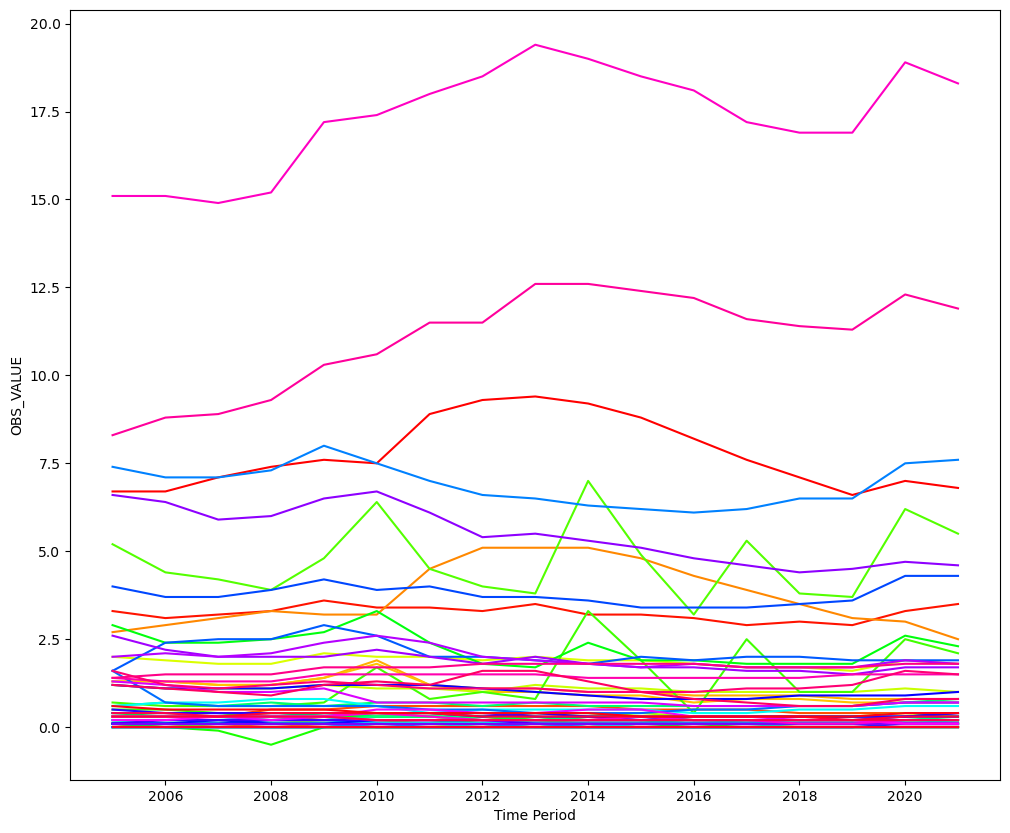

DK


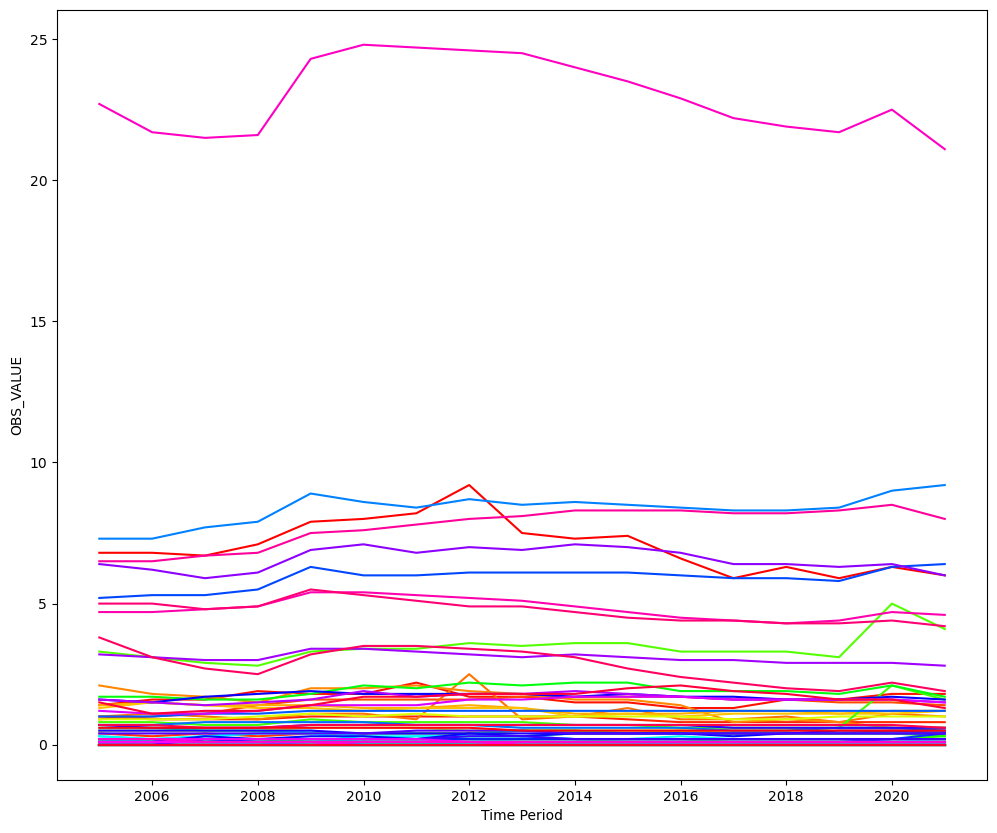

ES


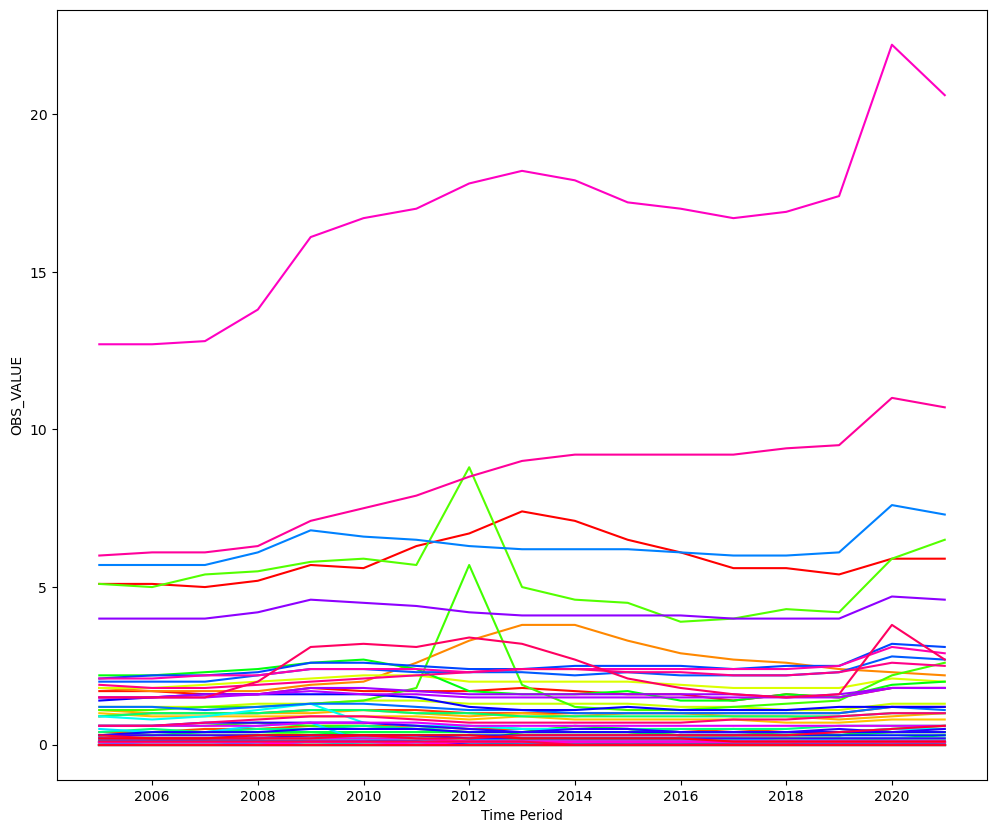

CZ


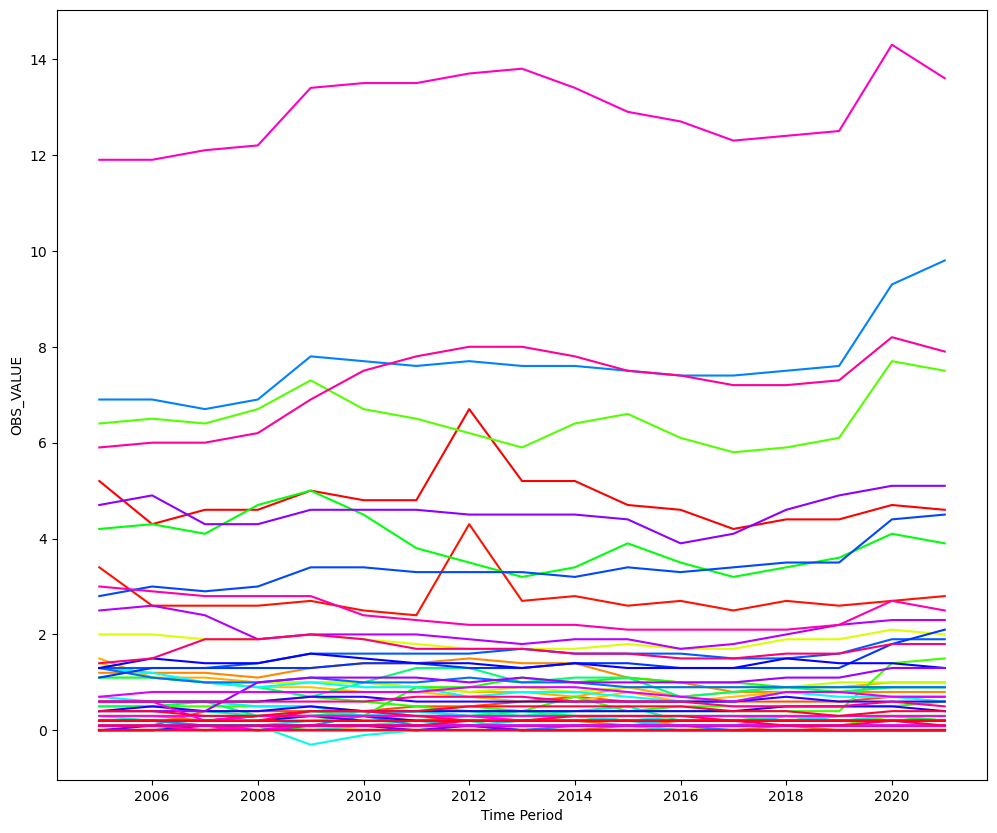

BG


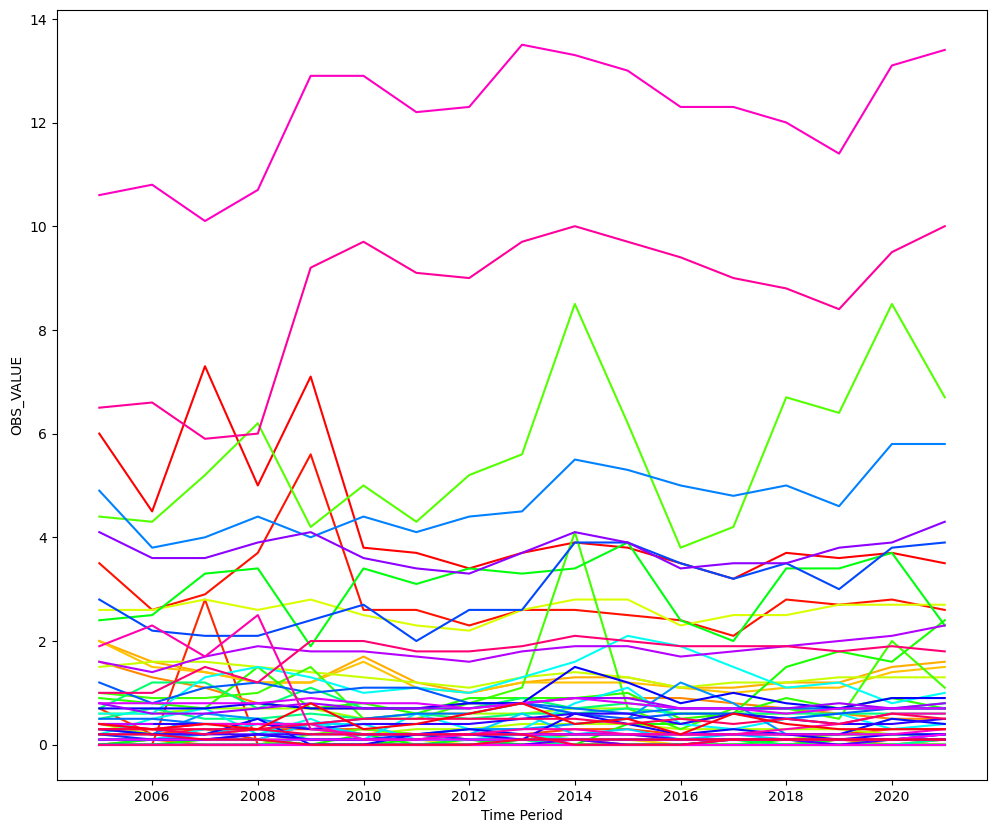

IE


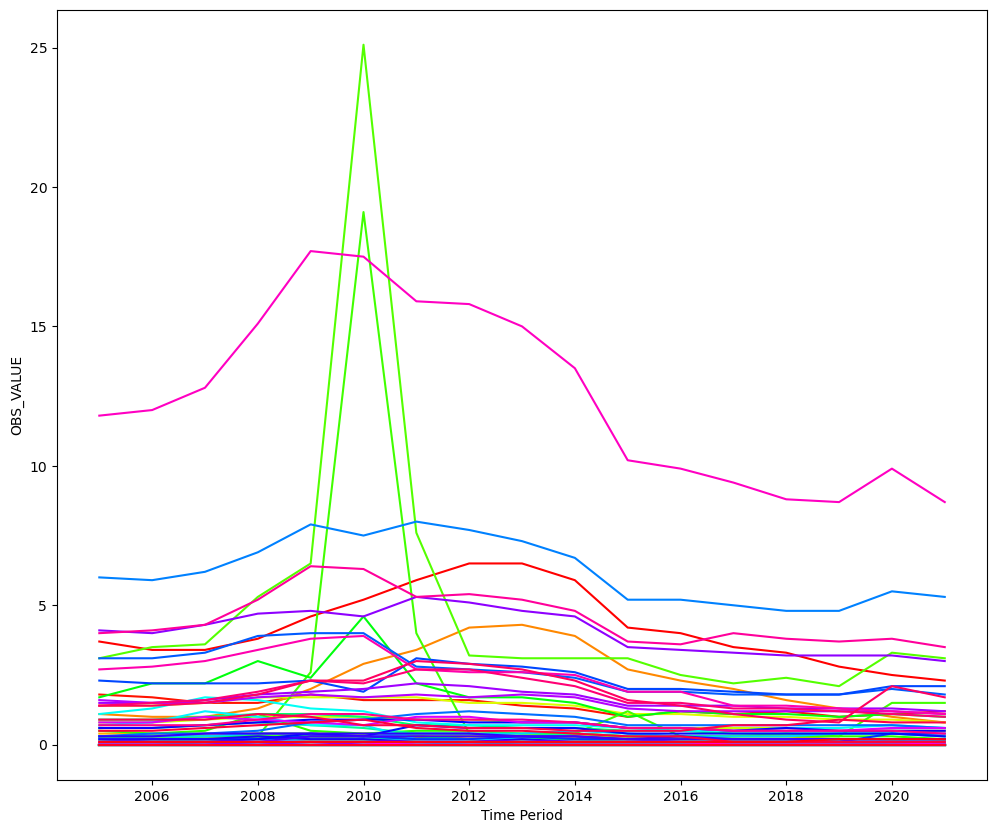

BE


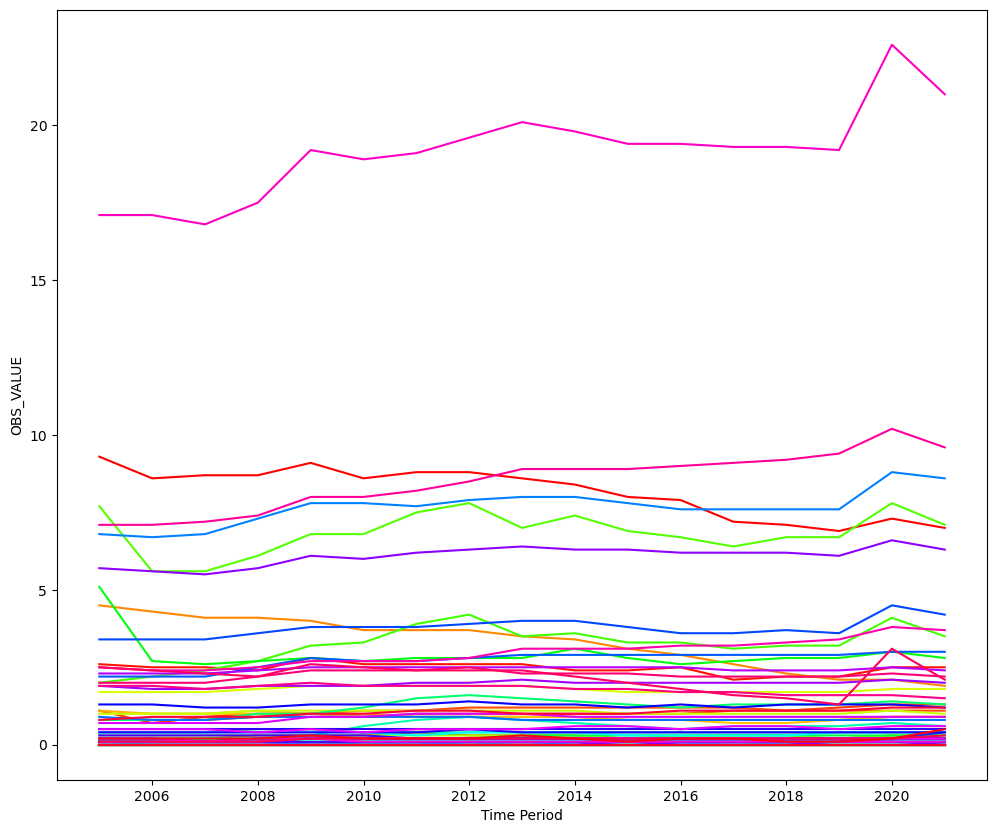

FR


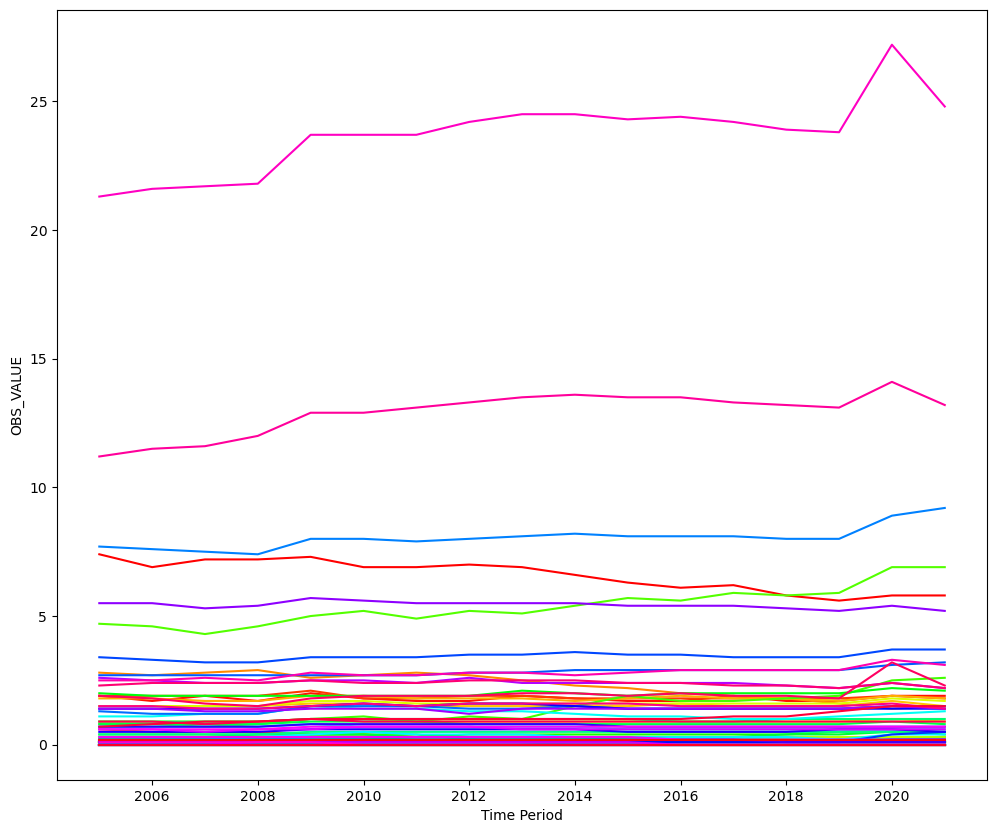

CH


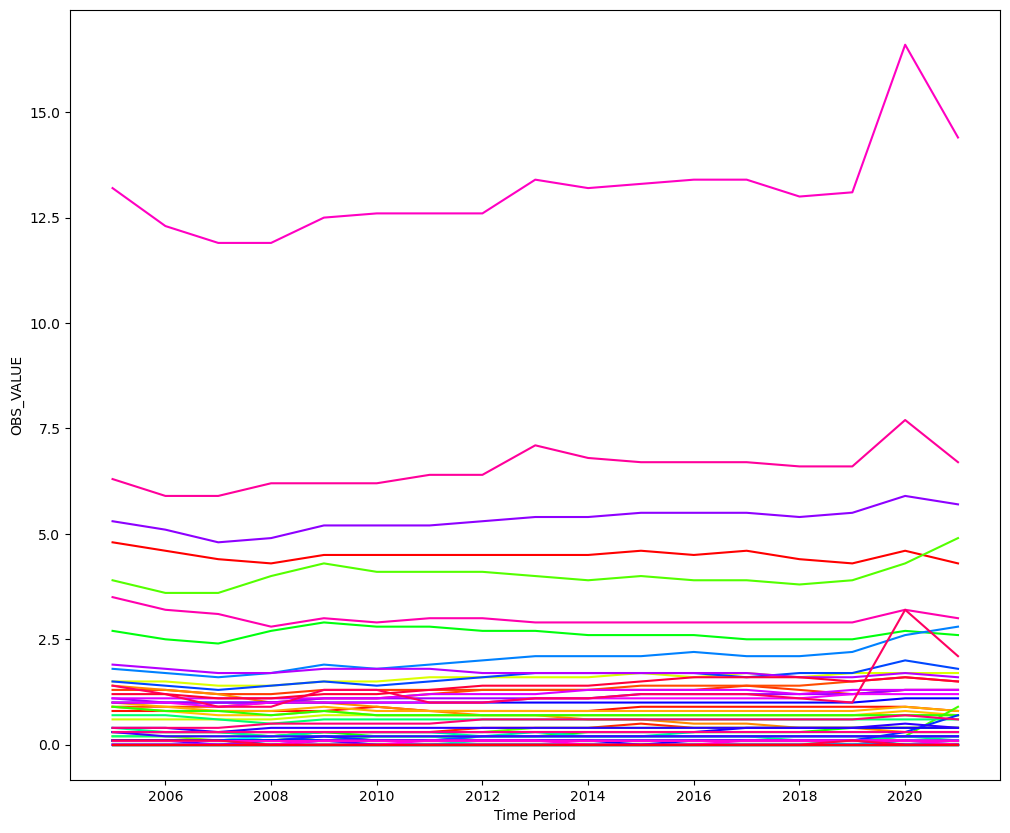

SI


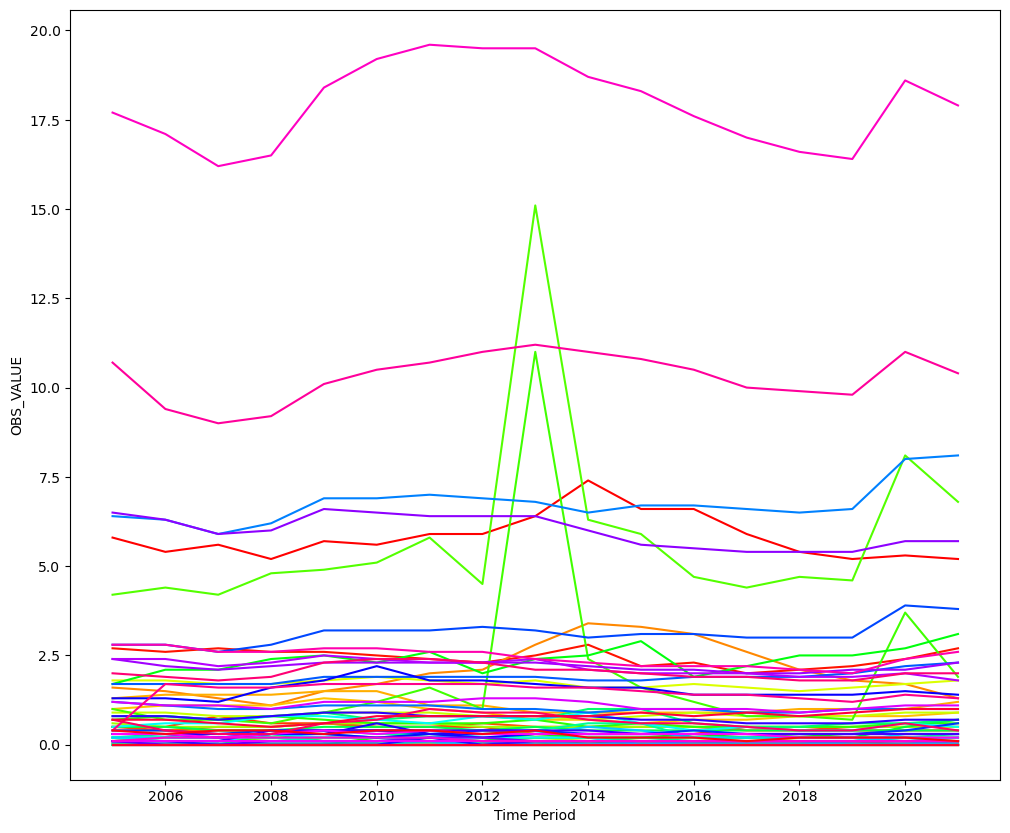

AT


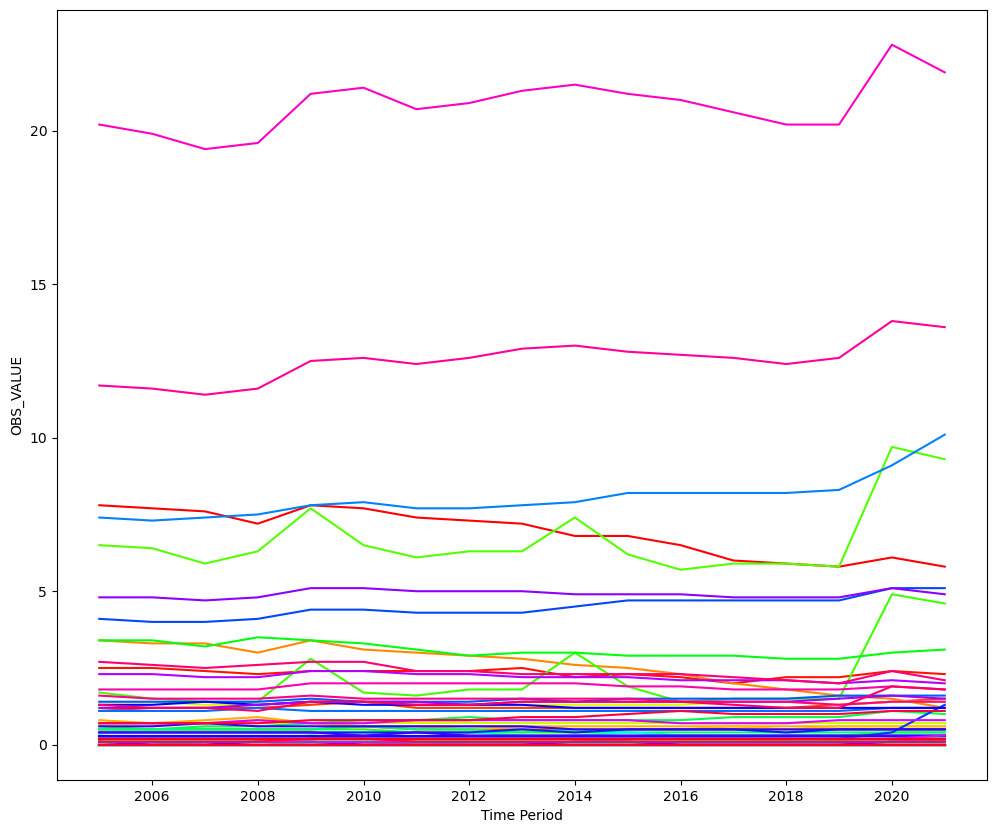

IT


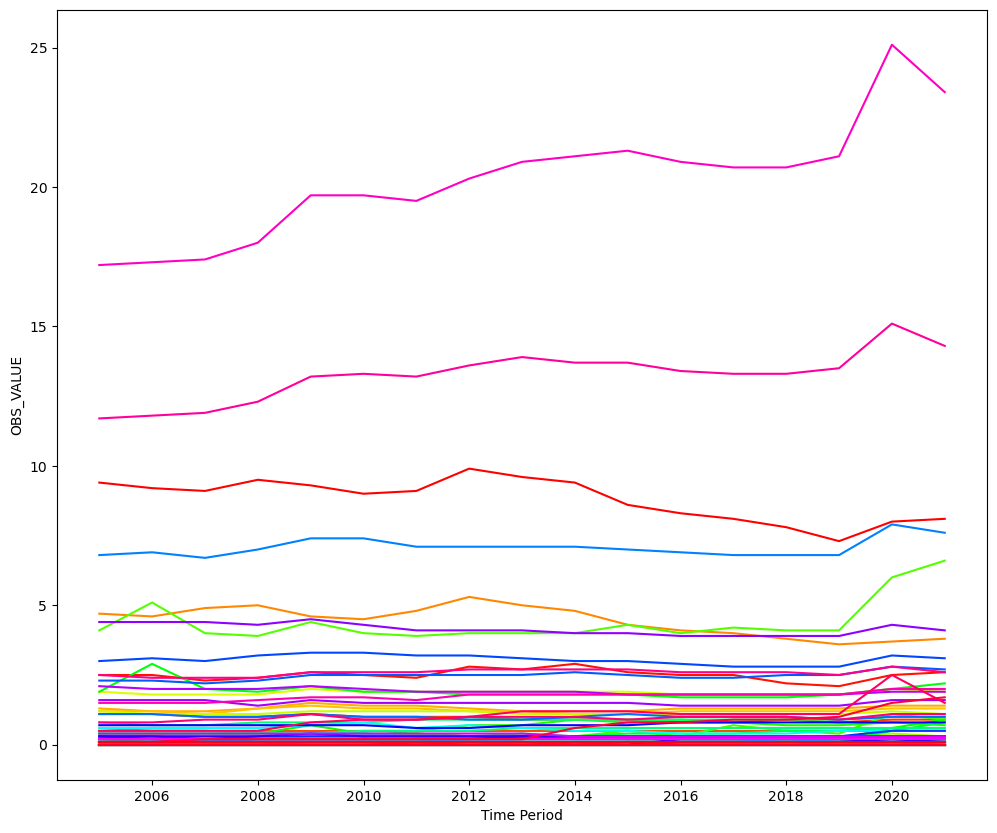

RO


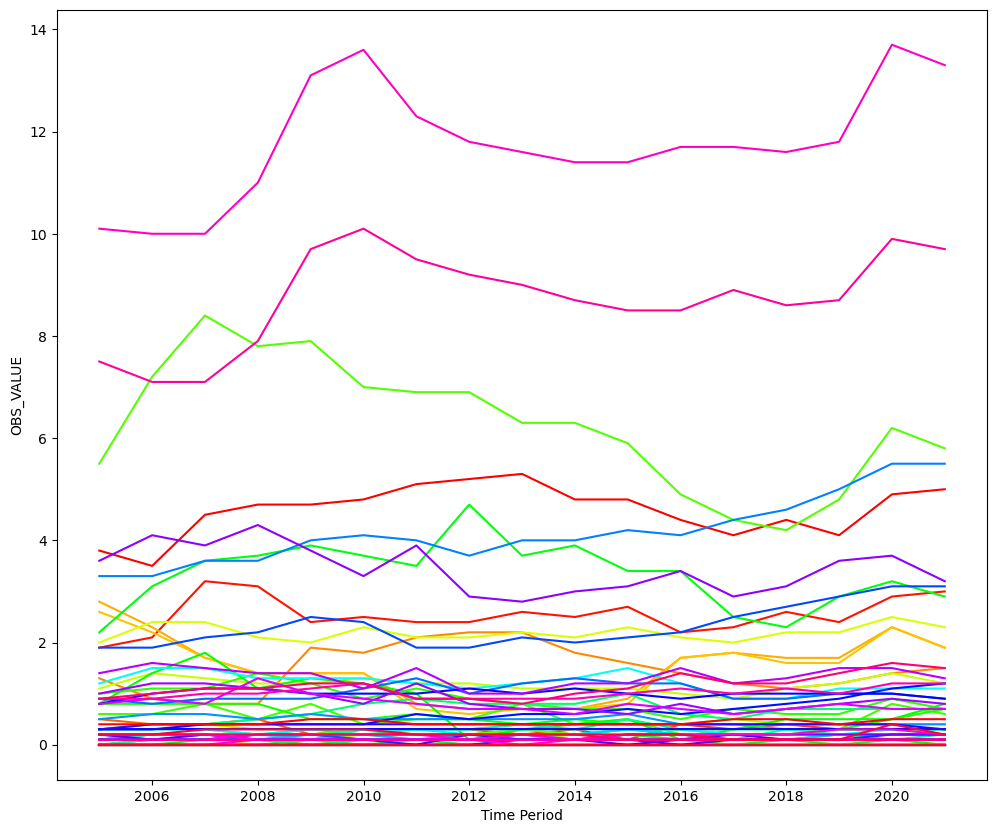

CY


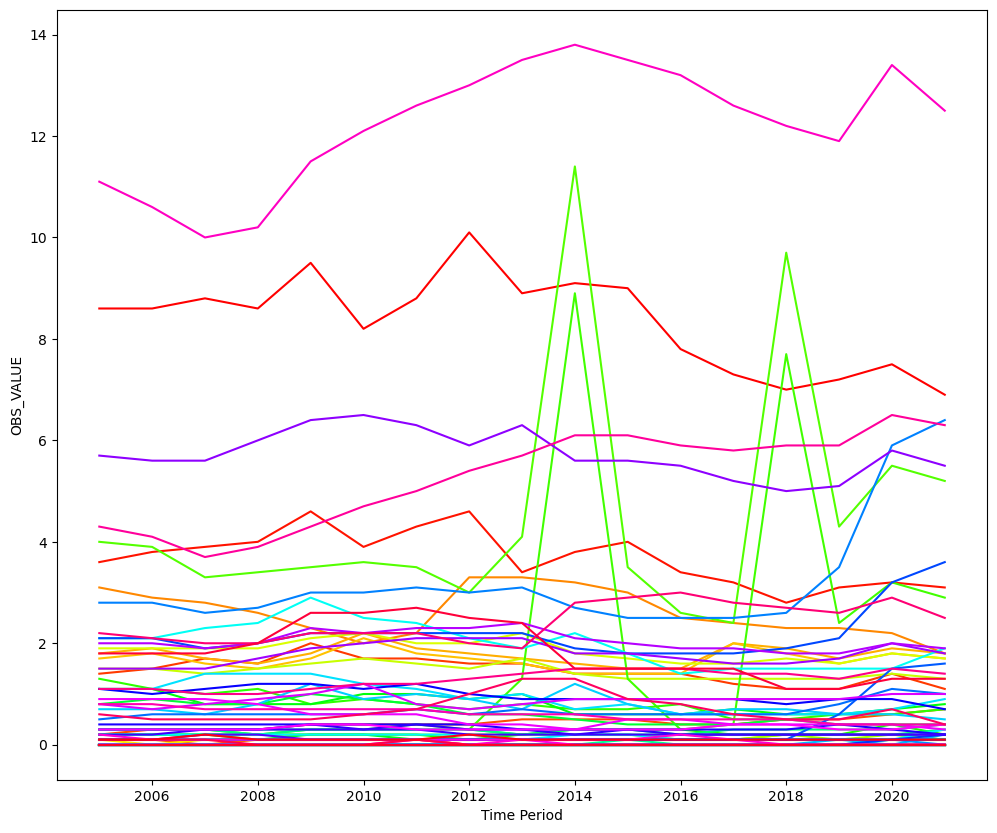

NL


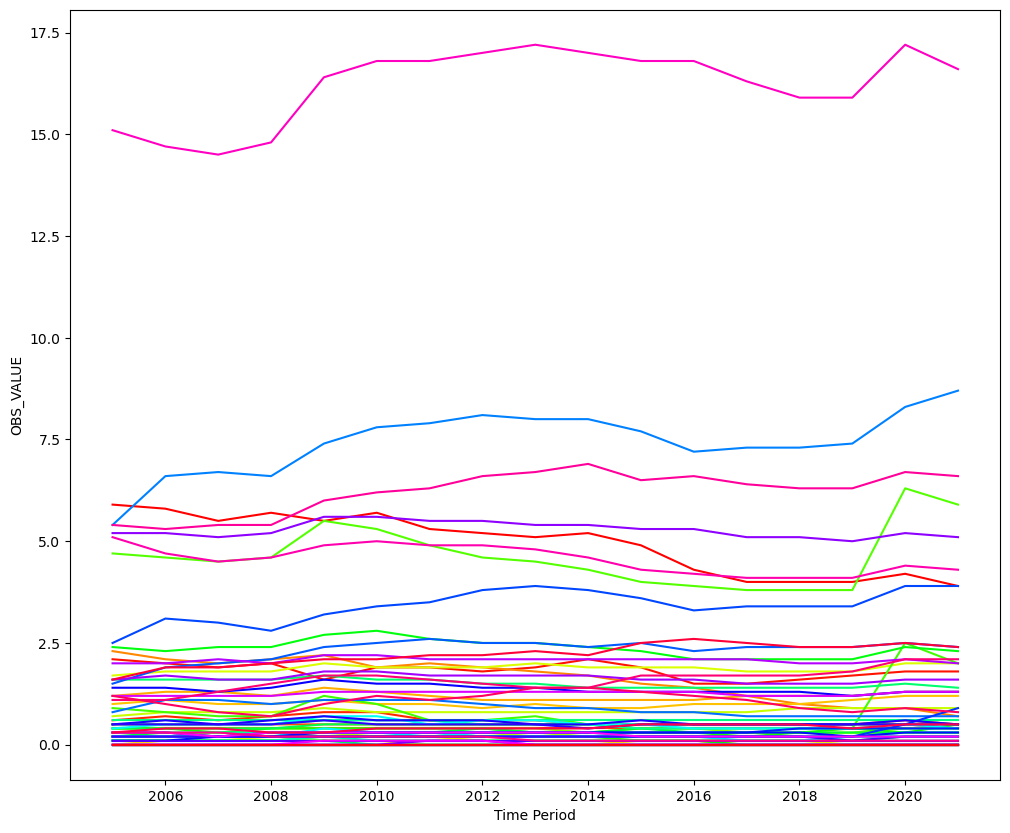

SE


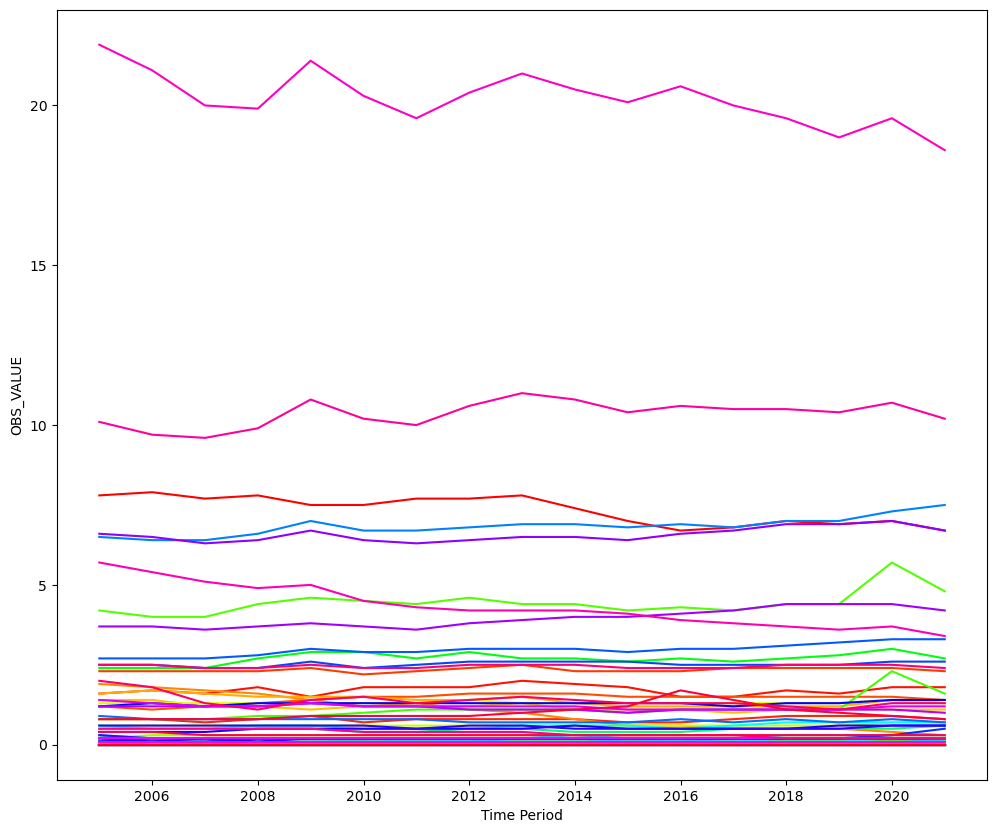

EE


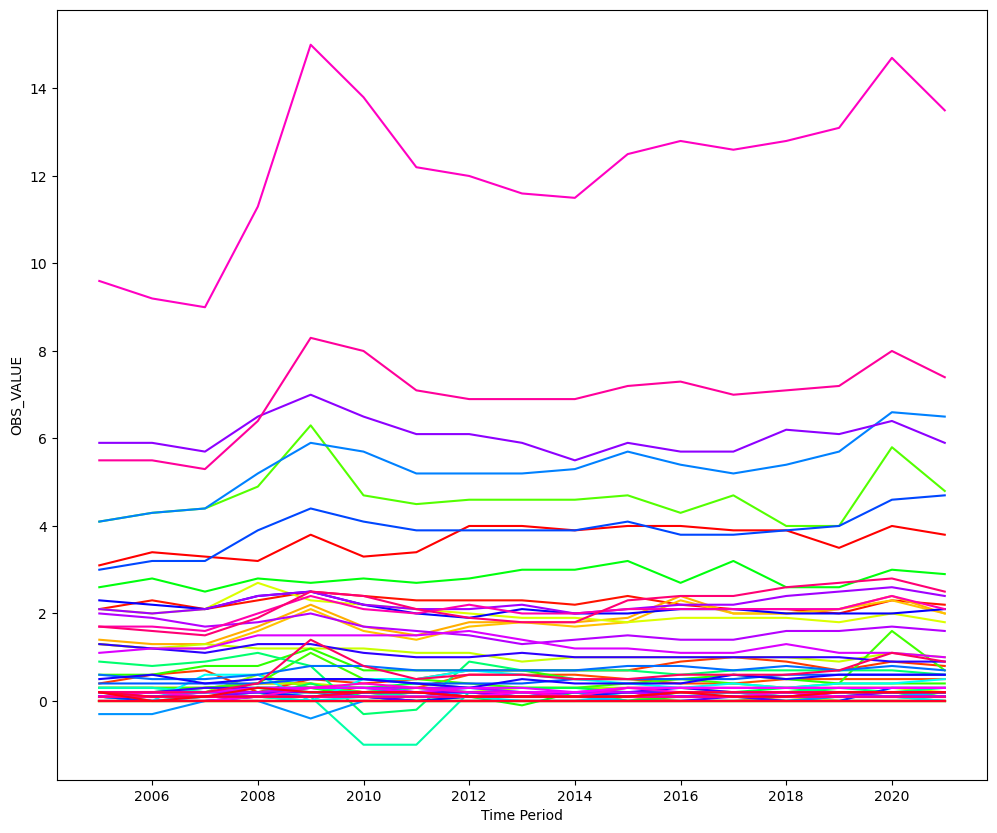

LV


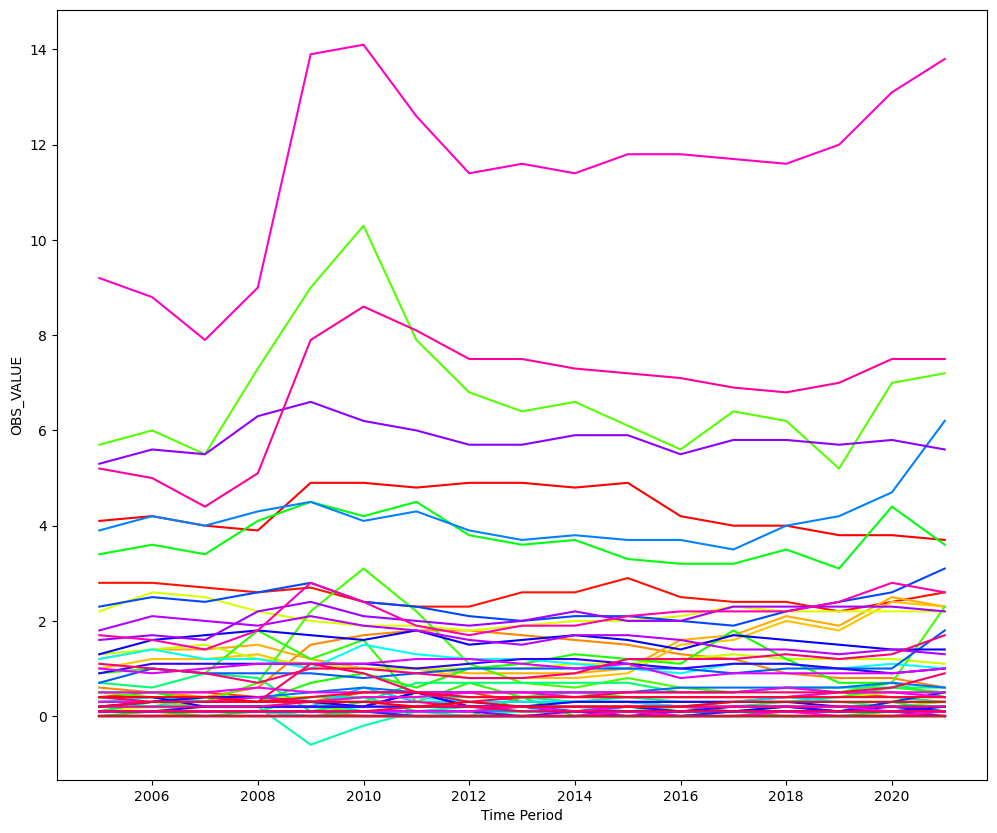

In [45]:
#mapping things out for each country
for country in countries:
    print(country)
    fig = plt.figure(figsize=(12, 10))
    df = exp_df[exp_df['geo'] == country]
    for i, (cofog99, group_df) in enumerate(df.groupby('cofog99')):
        plt.plot(group_df['TIME_PERIOD'], group_df['OBS_VALUE'], color=colors_array[i], label=cofog99)
#     plt.legend()
    plt.xlabel('Time Period')
    plt.ylabel('OBS_VALUE')
    plt.show()